In [25]:
from util import *
from swarm import *
from metrics import *
import random
import time
from IPython import display
import pylab as pl

In [26]:
conciliation_quota  = 1

critical_amount     = 100

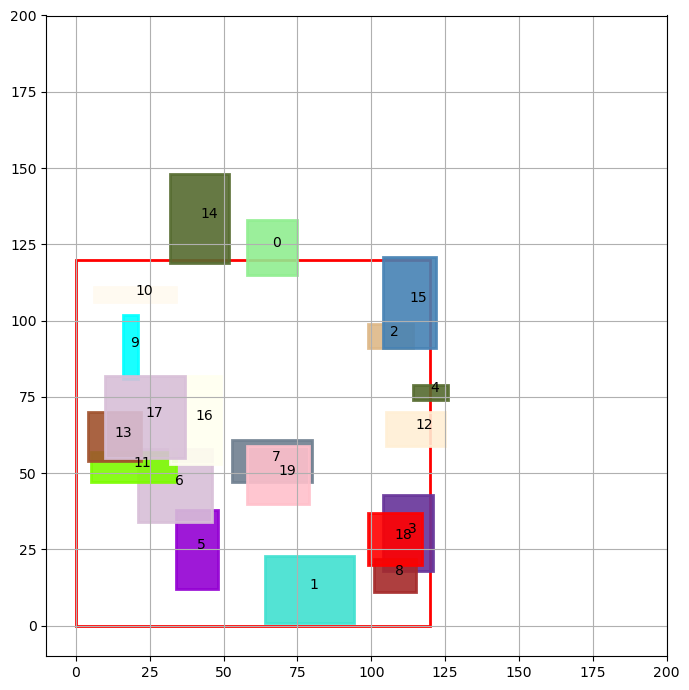

In [27]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 120,
               "height" : 120}

participants       = generate_unconnected_participants(20, layout_zone, 30, 30, 666)

a = plot_participants(layout_zone, participants, 200, 200)


In [28]:
participants            = determine_initial_conditions(participants, layout_zone, conciliation_quota, critical_amount)

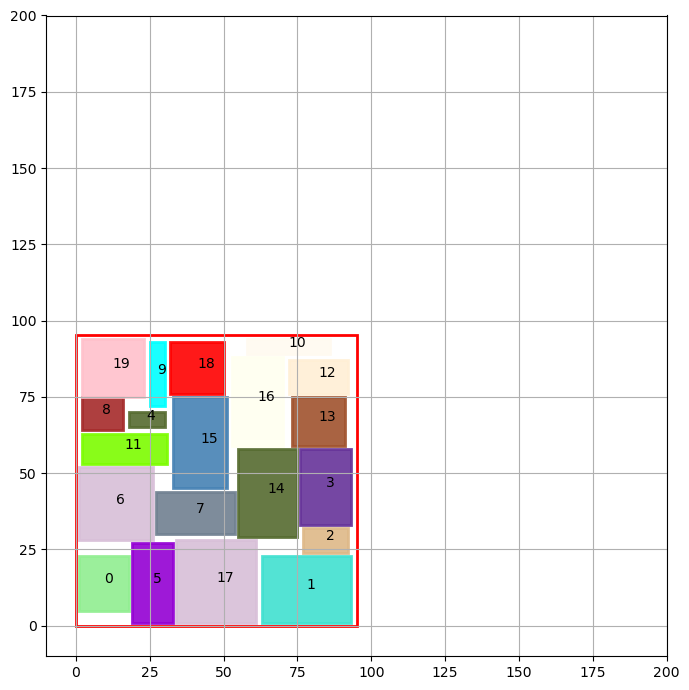

In [29]:
while True:

    for i in range(10): # maximum rounds of interaction

        participants    = one_round_of_interaction(participants, layout_zone, conciliation_quota, critical_amount)

        plot_participants(layout_zone, participants, 200, 200)

        last_moves = {key : value['last-move'] for key,value in participants.items()}

        moves = list(last_moves.values())

        if moves.count('center') == len(participants):
            break

    layout_zone         = scale_layout_zone(layout_zone, 0.99)

    if layout_zone['width'] < 90:
        break


In [30]:
ds = calculate_dead_space(participants, layout_zone)

print("Dead Space: " + str(ds) + " %")

Dead Space: 19.484557435146854 %
